In [19]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pandas as pd
from os import makedirs
from numpy import load
from random import seed
from random import random
from shutil import copyfile
import sys
from matplotlib import pyplot
# from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import numpy as np

(10222, 200, 200, 3) (10222, 0)


In [ ]:
labels_df = pd.read_csv('./labels.csv')
# labels_df.rename(columns={'id': 'name'}, inplace=True)
# define location of dataset
folder = './train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    filename = file.rstrip('.jpg')
    # print(labels_df.loc[labels_df['id'] == filename, ['breed']])
	# load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(labels_df.loc[labels_df['id'] == file]['breed'])
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_breeds_photos.npy', photos)
save('dogs_breeds_labels.npy', labels)

In [2]:
# load and confirm the shape
from numpy import load
photos = load('dogs_breeds_photos.npy', allow_pickle=True)
labels = load('dogs_breeds_labels.npy', allow_pickle=True)
print(photos.shape, labels.shape)

(10222, 200, 200, 3) (10222, 0)


In [3]:
from os import makedirs

labels_df = pd.read_csv('./labels.csv')
labels_list = labels_df['breed'].values
# create directories
dataset_home = 'dataset_dog_breeds/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    for labldir in labels_list:
        labldir = labldir + '/'
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [4]:
from random import seed
from random import random
from shutil import copyfile

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    name = file.rstrip('.jpg')
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    breed_dir = labels_df.loc[labels_df['id'] == name]['breed'].values + '/'
    # if file.startswith('cat'):
    #     dst = dataset_home + dst_dir + 'cats/'  + file
    #     copyfile(src, dst)
    # elif file.startswith('dog'):
    #     dst = dataset_home + dst_dir + 'dogs/'  + file
    #     copyfile(src, dst)
    dst = dataset_home + dst_dir + breed_dir[0]  + file
    copyfile(src, dst)

relu
pooling layers

In [62]:

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
# from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    # pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    # pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = 'wynik'
    pyplot.savefig(filename + '_plot.png')
    # pyplot.close()

Found 7598 images belonging to 120 classes.
Found 2624 images belonging to 120 classes.
> 0.724


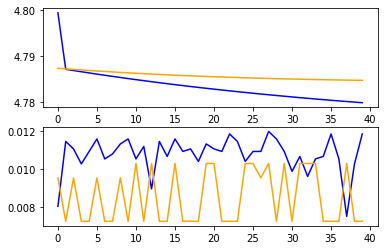

In [63]:
from tensorflow.keras.layers import Dropout

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, input_dim=120, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(120, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model()

datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('dataset_dog_breeds/train/', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dog_breeds/test/', batch_size=64, target_size=(200, 200))
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
                    validation_data=test_it, validation_steps=len(test_it), epochs=40, verbose=0)
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

Found 7598 images belonging to 120 classes.
Found 2624 images belonging to 120 classes.
> 2.058


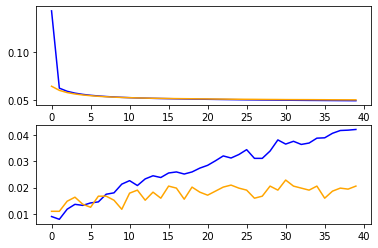

In [64]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(120, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model2 = define_model()

datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('dataset_dog_breeds/train/', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dog_breeds/test/',  batch_size=64, target_size=(200, 200))
# fit model
history = model2.fit(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=40, verbose=0)
# evaluate model
_, acc = model2.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

In [67]:
import numpy as np

labels_df = pd.read_csv('./labels.csv')
labels_list = sorted(labels_df['breed'].unique())
folder = './Fred/'
file = 'test.jpg'
photo = load_img(folder + file, target_size=(200, 200))
# convert to numpy array
photo = img_to_array(photo)
data = []
data.append(photo)
data = np.array(data)
result = model2.predict(data)[0]
result_dict = {}
for i, label in enumerate(labels_list):
    result_dict[label] = result[i]
{k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

{'affenpinscher': 0.0,
 'afghan_hound': 0.0,
 'african_hunting_dog': 0.0,
 'airedale': 0.0,
 'american_staffordshire_terrier': 0.0,
 'appenzeller': 0.0,
 'australian_terrier': 0.0,
 'basenji': 0.0,
 'basset': 0.0,
 'beagle': 0.0,
 'bedlington_terrier': 0.0,
 'bernese_mountain_dog': 0.0,
 'black-and-tan_coonhound': 0.0,
 'blenheim_spaniel': 0.0,
 'bloodhound': 0.0,
 'bluetick': 0.0,
 'border_collie': 0.0,
 'border_terrier': 0.0,
 'borzoi': 0.0,
 'boston_bull': 0.0,
 'bouvier_des_flandres': 0.0,
 'boxer': 0.0,
 'brabancon_griffon': 0.0,
 'briard': 0.0,
 'brittany_spaniel': 0.0,
 'bull_mastiff': 0.0,
 'cairn': 0.0,
 'cardigan': 0.0,
 'chesapeake_bay_retriever': 0.0,
 'chihuahua': 0.0,
 'chow': 0.0,
 'clumber': 0.0,
 'cocker_spaniel': 0.0,
 'collie': 0.0,
 'curly-coated_retriever': 0.0,
 'dandie_dinmont': 0.0,
 'dhole': 0.0,
 'dingo': 0.0,
 'doberman': 0.0,
 'english_foxhound': 0.0,
 'english_setter': 0.0,
 'english_springer': 0.0,
 'entlebucher': 0.0,
 'eskimo_dog': 0.0,
 'flat-coated_ret

In [68]:
import numpy as np

labels_df = pd.read_csv('./labels.csv')
labels_list = sorted(labels_df['breed'].unique())
folder = './labr/'
file = 'test.jpg'
photo = load_img(folder + file, target_size=(200, 200))
# convert to numpy array
photo = img_to_array(photo)
data = []
data.append(photo)
data = np.array(data)
result = model2.predict(data)[0]
result_dict = {}
for i, label in enumerate(labels_list):
    result_dict[label] = result[i]
{k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

{'affenpinscher': 0.0,
 'afghan_hound': 0.0,
 'african_hunting_dog': 0.0,
 'airedale': 0.0,
 'american_staffordshire_terrier': 0.0,
 'appenzeller': 0.0,
 'australian_terrier': 0.0,
 'basenji': 0.0,
 'basset': 0.0,
 'beagle': 0.0,
 'bedlington_terrier': 0.0,
 'bernese_mountain_dog': 0.0,
 'black-and-tan_coonhound': 0.0,
 'blenheim_spaniel': 0.0,
 'bloodhound': 0.0,
 'bluetick': 0.0,
 'border_collie': 0.0,
 'border_terrier': 0.0,
 'borzoi': 0.0,
 'boston_bull': 0.0,
 'bouvier_des_flandres': 0.0,
 'boxer': 0.0,
 'brabancon_griffon': 0.0,
 'briard': 0.0,
 'brittany_spaniel': 0.0,
 'bull_mastiff': 0.0,
 'cairn': 0.0,
 'cardigan': 0.0,
 'chesapeake_bay_retriever': 0.0,
 'chihuahua': 0.0,
 'chow': 0.0,
 'clumber': 0.0,
 'cocker_spaniel': 0.0,
 'collie': 0.0,
 'curly-coated_retriever': 0.0,
 'dandie_dinmont': 0.0,
 'dhole': 0.0,
 'dingo': 0.0,
 'doberman': 0.0,
 'english_foxhound': 0.0,
 'english_setter': 0.0,
 'english_springer': 0.0,
 'entlebucher': 0.0,
 'eskimo_dog': 0.0,
 'flat-coated_ret